In [2]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
# Global settings for MatPlotlib
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'

# Use the same Font as LaTeX
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['cmr10']
plt.rcParams["text.usetex"] = True
plt.rcParams["axes.formatter.use_mathtext"] = True

# SKVI


## Compute Budget Ablation

In [4]:
linear_system_skvi_compute_csv = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/AblationAnalysis/SKVI/NumActionsNumTrainEpochs/LinearSystem.csv"
fluid_flow_skvi_compute_csv = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/AblationAnalysis/SKVI/NumActionsNumTrainEpochs/FluidFlow.csv"
lorenz_skvi_compute_csv = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/AblationAnalysis/SKVI/NumActionsNumTrainEpochs/Lorenz.csv"
double_well_skvi_compute_csv = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/AblationAnalysis/SKVI/NumActionsNumTrainEpochs/DoubleWell.csv"

### Linear System

<Axes: >

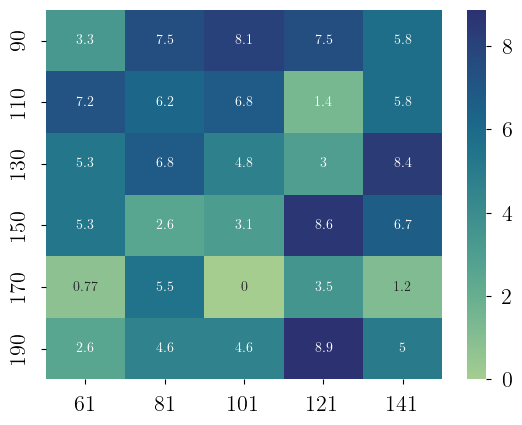

In [5]:
linear_system_skvi_compute_frame = pd.read_csv(linear_system_skvi_compute_csv, delimiter=',', header=0, index_col=0)
linear_system_skvi_compute_max_val = linear_system_skvi_compute_frame.max().max()
percent_difference_linear_system_skvi_compute = linear_system_skvi_compute_frame.transform(lambda x: ((x/linear_system_skvi_compute_max_val) - 1) * 100)

# Plot the Heatmap
sns.heatmap(percent_difference_linear_system_skvi_compute, annot=True, cmap="crest")

# Store both pandas dataframes to parquet files
#linear_system_skvi_compute_frame.to_parquet('linear_system_skvi_compute.parquet.gzip', compression='gzip')
#percent_difference_linear_system_skvi_compute.to_parquet('percent_difference_linear_system_skvi_compute.parquet.gzip', compression='gzip')

### Fluid Flow

<Axes: >

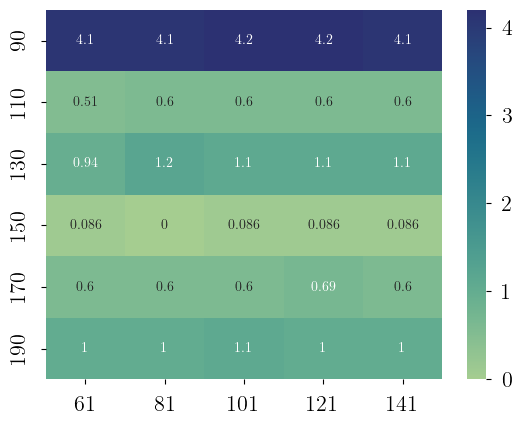

In [6]:
fluid_flow_skvi_compute_frame = pd.read_csv(fluid_flow_skvi_compute_csv, delimiter=',', header=0, index_col=0)
fluid_flow_skvi_compute_max_val = fluid_flow_skvi_compute_frame.max().max()
percent_difference_fluid_flow_skvi_compute = fluid_flow_skvi_compute_frame.transform(lambda x: ((x/fluid_flow_skvi_compute_max_val) - 1) * 100)

# Plot the Heatmap
sns.heatmap(percent_difference_fluid_flow_skvi_compute, annot=True, cmap="crest")

# Store both pandas dataframes to parquet files
#fluid_flow_skvi_compute_frame.to_parquet('fluid_flow_skvi_compute.parquet.gzip', compression='gzip')
#percent_difference_fluid_flow_skvi_compute.to_parquet('percent_difference_fluid_flow_skvi_compute.parquet.gzip', compression='gzip')

### Lorenz

<Axes: >

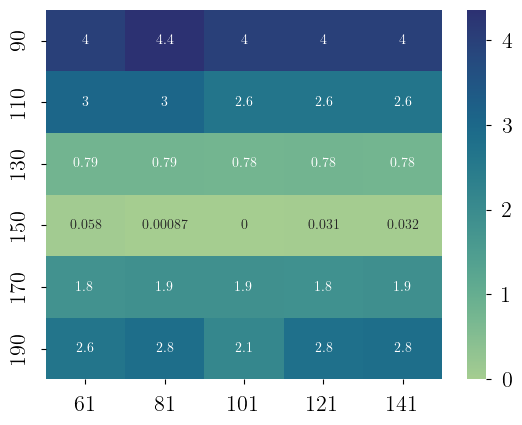

In [7]:
lorenz_skvi_compute_frame = pd.read_csv(lorenz_skvi_compute_csv, delimiter=',', header=0, index_col=0)
lorenz_skvi_compute_max_val = lorenz_skvi_compute_frame.max().max()
percent_difference_lorenz_skvi_compute = lorenz_skvi_compute_frame.transform(lambda x: ((x/lorenz_skvi_compute_max_val) - 1) * 100)

# Plot the Heatmap
sns.heatmap(percent_difference_lorenz_skvi_compute, annot=True, cmap="crest")

# Store both pandas dataframes to parquet files
#lorenz_skvi_compute_frame.to_parquet('lorenz_skvi_compute.parquet.gzip', compression='gzip')
#percent_difference_lorenz_skvi_compute.to_parquet('percent_difference_lorenz_skvi_compute.parquet.gzip', compression='gzip')

### (Stochastic) Double Well

<Axes: >

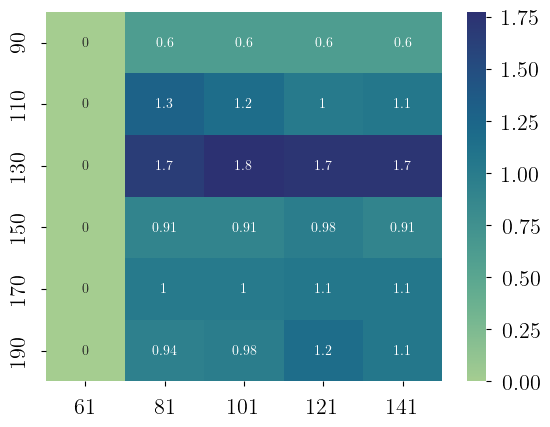

In [8]:
double_well_skvi_compute_frame = pd.read_csv(double_well_skvi_compute_csv, delimiter=',', header=0, index_col=0)
double_well_skvi_compute_max_val = double_well_skvi_compute_frame.max().max()
percent_difference_double_well_skvi_compute = double_well_skvi_compute_frame.transform(lambda x: ((x/double_well_skvi_compute_max_val) - 1) * 100)

# Plot the Heatmap
sns.heatmap(percent_difference_double_well_skvi_compute, annot=True, cmap="crest")

# Store both pandas dataframes to parquet files
#double_well_skvi_compute_frame.to_parquet('double_well_skvi_compute.parquet.gzip', compression='gzip')
#percent_difference_double_well_skvi_compute.to_parquet('percent_difference_double_well_skvi_compute.parquet.gzip', compression='gzip')

Post-proces the Lorenz data frame to cut down to 2 positions after the comman

In [18]:
percent_difference_lorenz_skvi_compute

,61,81,101,121,141
90,3.998263,4.353452,3.989579,3.986105,3.982631
110,3.027356,3.027356,2.638298,2.635693,2.635693
130,0.788537,0.792879,0.778984,0.784195,0.779852
150,0.058185,0.000868,0.000000,0.031264,0.032132
170,1.799392,1.854972,1.859314,1.844551,1.880156
190,2.633956,2.827616,2.131133,2.777247,2.831958


## Big Plot containing all 4 Subplots 

Text(0.06, 0.5, 'Number of Epochs')

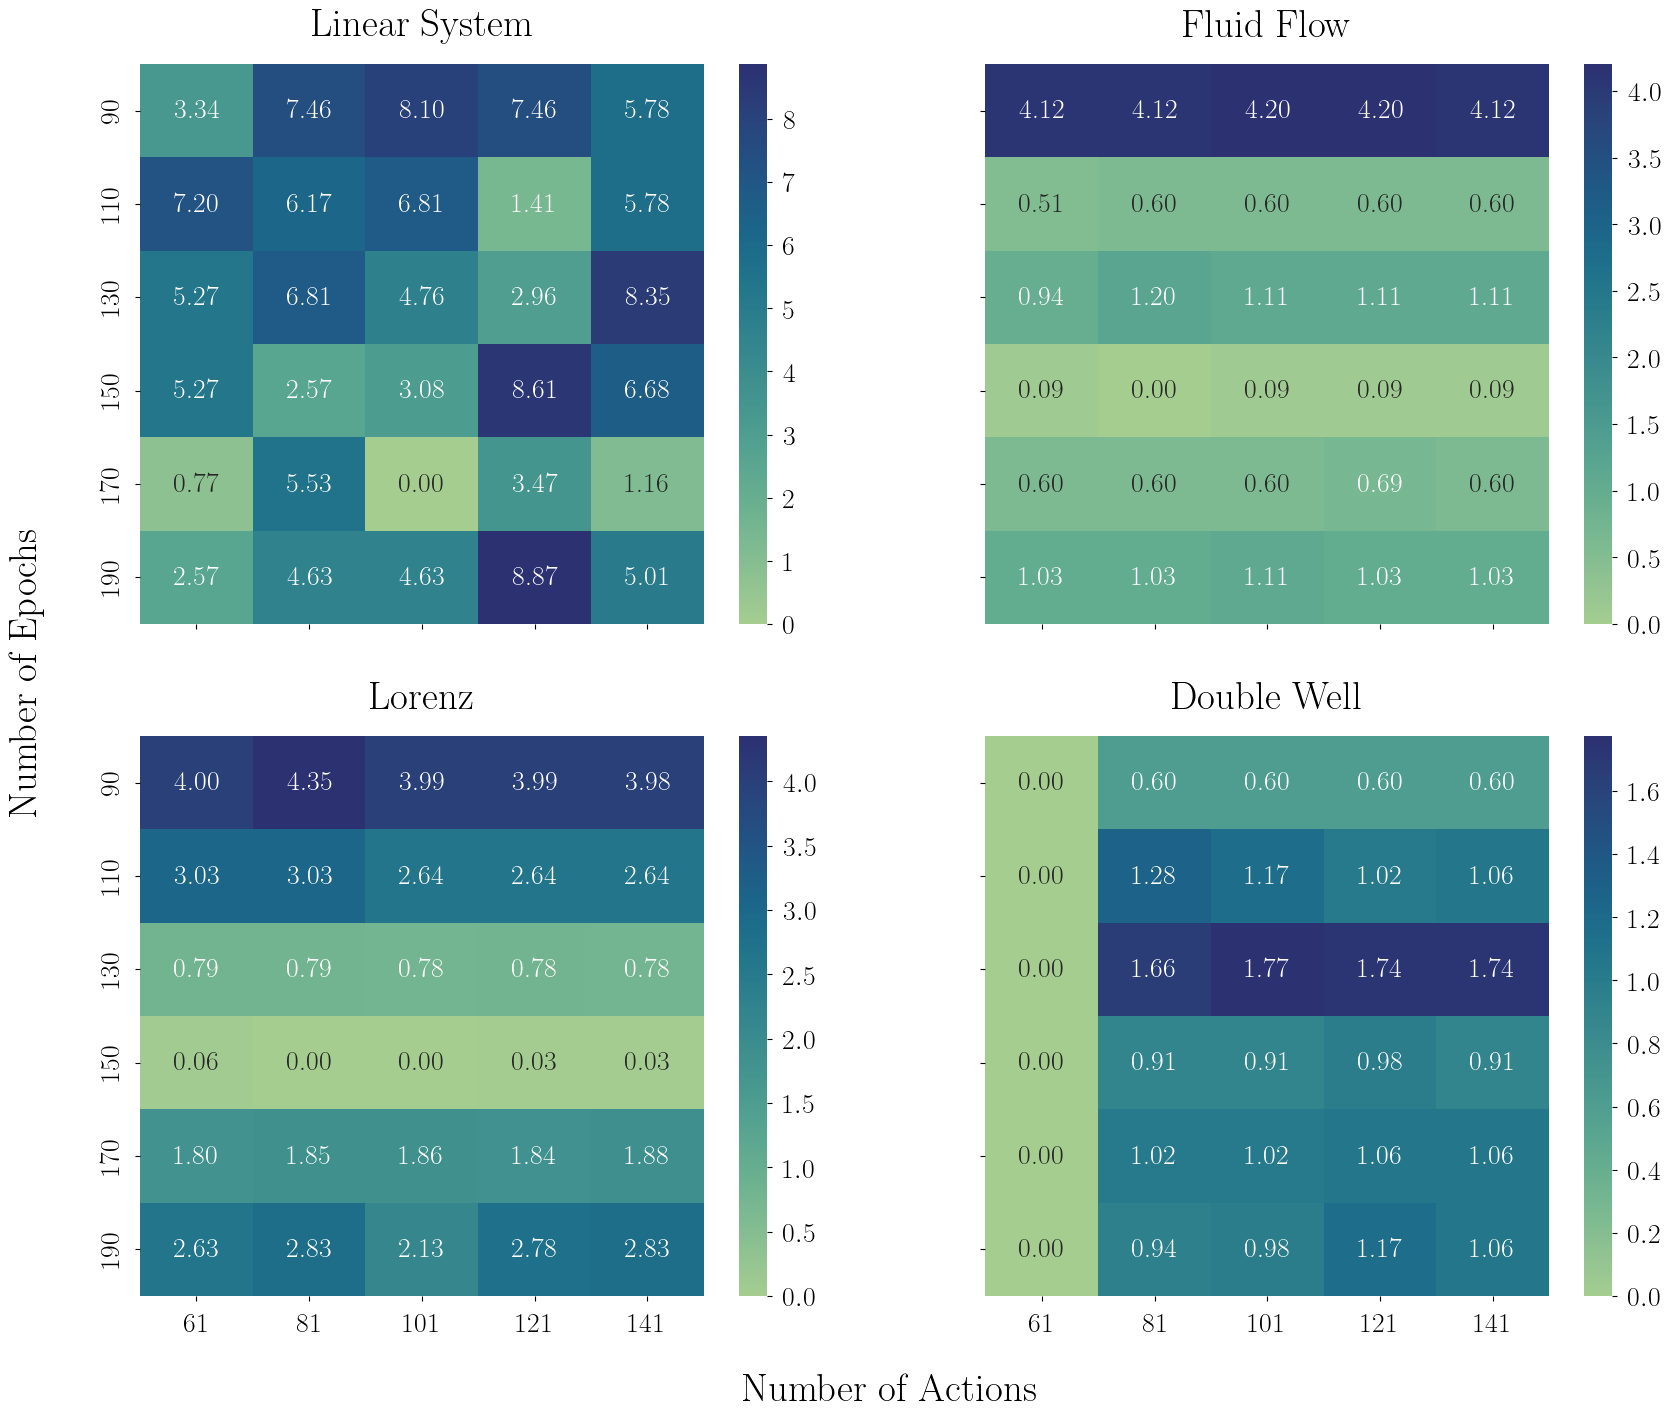

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16), sharex=True, sharey=True)

# Plot all 4 heatmaps
sns.heatmap(ax=axes[0, 0], data=percent_difference_linear_system_skvi_compute, annot=True, cmap="crest", fmt='.2f', annot_kws={"fontsize":20}).set_title('Linear System', fontsize=28, pad=20)
sns.heatmap(ax=axes[0, 1], data=percent_difference_fluid_flow_skvi_compute, annot=True, cmap="crest", fmt='.2f', annot_kws={"fontsize":20}).set_title('Fluid Flow', fontsize=28, pad=20)
sns.heatmap(ax=axes[1, 0], data=percent_difference_lorenz_skvi_compute, annot=True, cmap="crest", fmt='.2f', annot_kws={"fontsize":20}).set_title('Lorenz', fontsize=28, pad=20)
sns.heatmap(ax=axes[1, 1], data=percent_difference_double_well_skvi_compute, annot=True, cmap="crest", fmt='.2f', annot_kws={"fontsize":20}).set_title('Double Well', fontsize=28, pad=20)

# Major x-, and y-labels
fig.supxlabel('Number of Actions', fontsize=28, y=0.04)
fig.supylabel('Number of Epochs', fontsize=28, x=0.06)


In [149]:
# Save the figure
plt.savefig('Ablation_SKVI_Compute.png')

<Figure size 640x480 with 0 Axes>

In [22]:
# Close the figure
plt.close()

# SAKC

## Monoids

In [23]:
linear_system_sakc_monoids_csv = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/AblationAnalysis/SAKC/Monoids/LinearSystem.csv"
fluid_flow_sakc_monoids_csv = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/AblationAnalysis/SAKC/Monoids/FluidFlow.csv"
lorenz_system_sakc_monoids_csv = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/AblationAnalysis/SAKC/Monoids/Lorenz.csv"
double_well_sakc_monoids_csv = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/AblationAnalysis/SAKC/Monoids/DoubleWell.csv"

### Linear System

<Axes: >

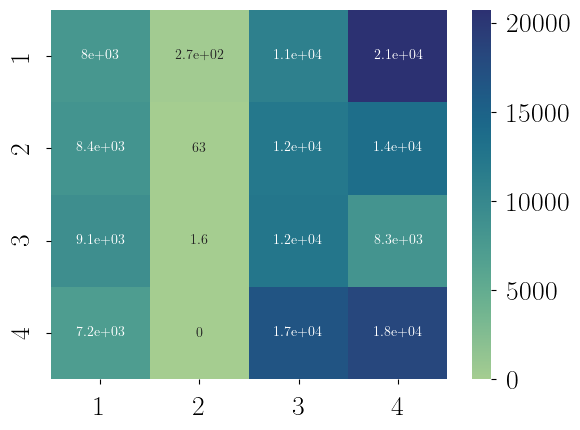

In [24]:
linear_sakc_monoid_frame = pd.read_csv(linear_system_sakc_monoids_csv, delimiter=',', header=0, index_col=0)
max_val = linear_sakc_monoid_frame.max().max()
percent_difference_linear_sakc_monoid = linear_sakc_monoid_frame.transform(lambda x: ((x/max_val) - 1) * 100)

# Plot the heatmap
sns.heatmap(percent_difference_linear_sakc_monoid, annot=True, cmap="crest")

# Storing both Pandas dataframes to parquet format
#linear_sakc_monoid_frame.to_parquet('linear_sakc_monoid.parquet.gzip', compression='gzip')
#percent_difference_linear_sakc_monoid.to_parquet('percent_difference_linear_sakc_monoid.parquet.gzip', compression='gzip')

### Fluid Flow

<Axes: >

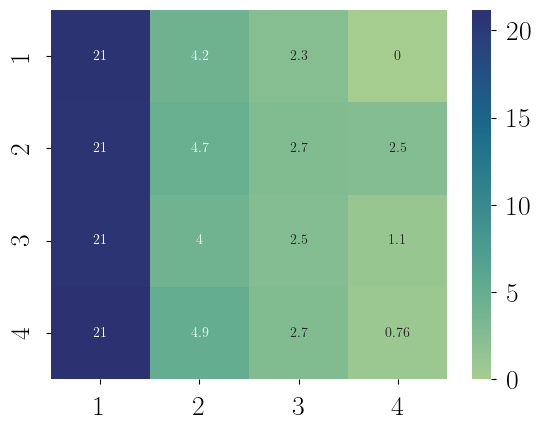

In [25]:
fluid_flow_sakc_monoid_frame = pd.read_csv(fluid_flow_sakc_monoids_csv, delimiter=',', header=0, index_col=0)
fluid_flow_sakc_monoid_max_val = fluid_flow_sakc_monoid_frame.max().max()
percent_difference_fluid_flow_sakc_monoid = fluid_flow_sakc_monoid_frame.transform(lambda x: ((x/fluid_flow_sakc_monoid_max_val) - 1) * 100)

# Plot the heatmap
sns.heatmap(percent_difference_fluid_flow_sakc_monoid, annot=True, cmap="crest")

# Store both Pandas dataframes into parquet files
#fluid_flow_sakc_monoid_frame.to_parquet('fluid_flow_sakc_monoid.parquet.gzip', compression='gzip')
#percent_difference_fluid_flow_sakc_monoid.to_parquet('percent_difference_fluid_flow_sakc_monoid.parquet.gzip', compression='gzip')

### Lorenz

<Axes: >

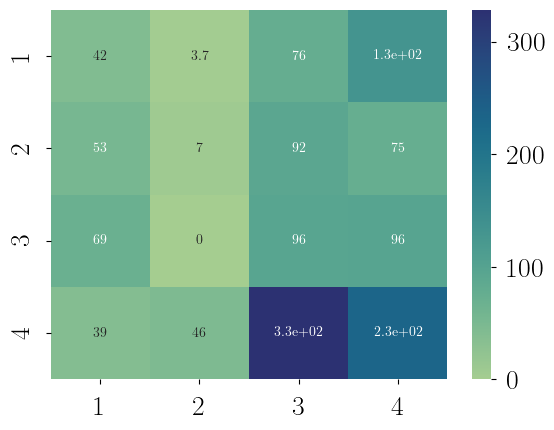

In [26]:
lorenz_sakc_monoid_frame = pd.read_csv(lorenz_system_sakc_monoids_csv, delimiter=',', header=0, index_col=0)
lorenz_sakc_monoid_max_val = lorenz_sakc_monoid_frame.max().max()
percent_difference_lorenz_sakc_monoid = lorenz_sakc_monoid_frame.transform(lambda x: ((x/lorenz_sakc_monoid_max_val) - 1) * 100)

# Plot the Heatmap
sns.heatmap(percent_difference_lorenz_sakc_monoid, annot=True, cmap="crest")

# Store both Pandas dataframes into parquet files
#lorenz_sakc_monoid_frame.to_parquet('lorenz_sakc_monoid.parquet.gzip', compression='gzip')
#percent_difference_lorenz_sakc_monoid.to_parquet('percent_difference_lorenz_sakc_monoid.parquet.gzip', compression='gzip')

### (Stochastic) Double Well

<Axes: >

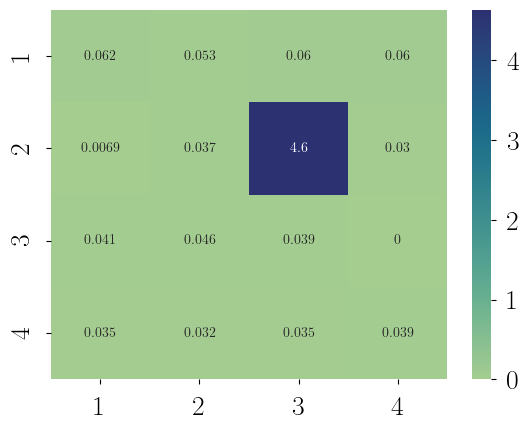

In [27]:
double_well_sakc_monoid_frame = pd.read_csv(double_well_sakc_monoids_csv, delimiter=',', header=0, index_col=0)
double_well_sakc_monoid_max_val = double_well_sakc_monoid_frame.max().max()
percent_difference_double_well_sakc_monoid = double_well_sakc_monoid_frame.transform(lambda x: ((x/double_well_sakc_monoid_max_val) - 1) * 100)

# Plot the Heatmap
sns.heatmap(percent_difference_double_well_sakc_monoid, annot=True, cmap="crest")

# Store both pandas dataframes into parquet files
#double_well_sakc_monoid_frame.to_parquet('double_well_sakc_monoid.parquet.gzip', compression='gzip')
#percent_difference_double_well_sakc_monoid.to_parquet('percent_difference_double_well_sakc_monoid.parquet.gzip', compression='gzip')

## Big Plot containing all 4 subplots with subtitles

Text(0.06, 0.5, 'Order of Monomials of Action Dictionary')

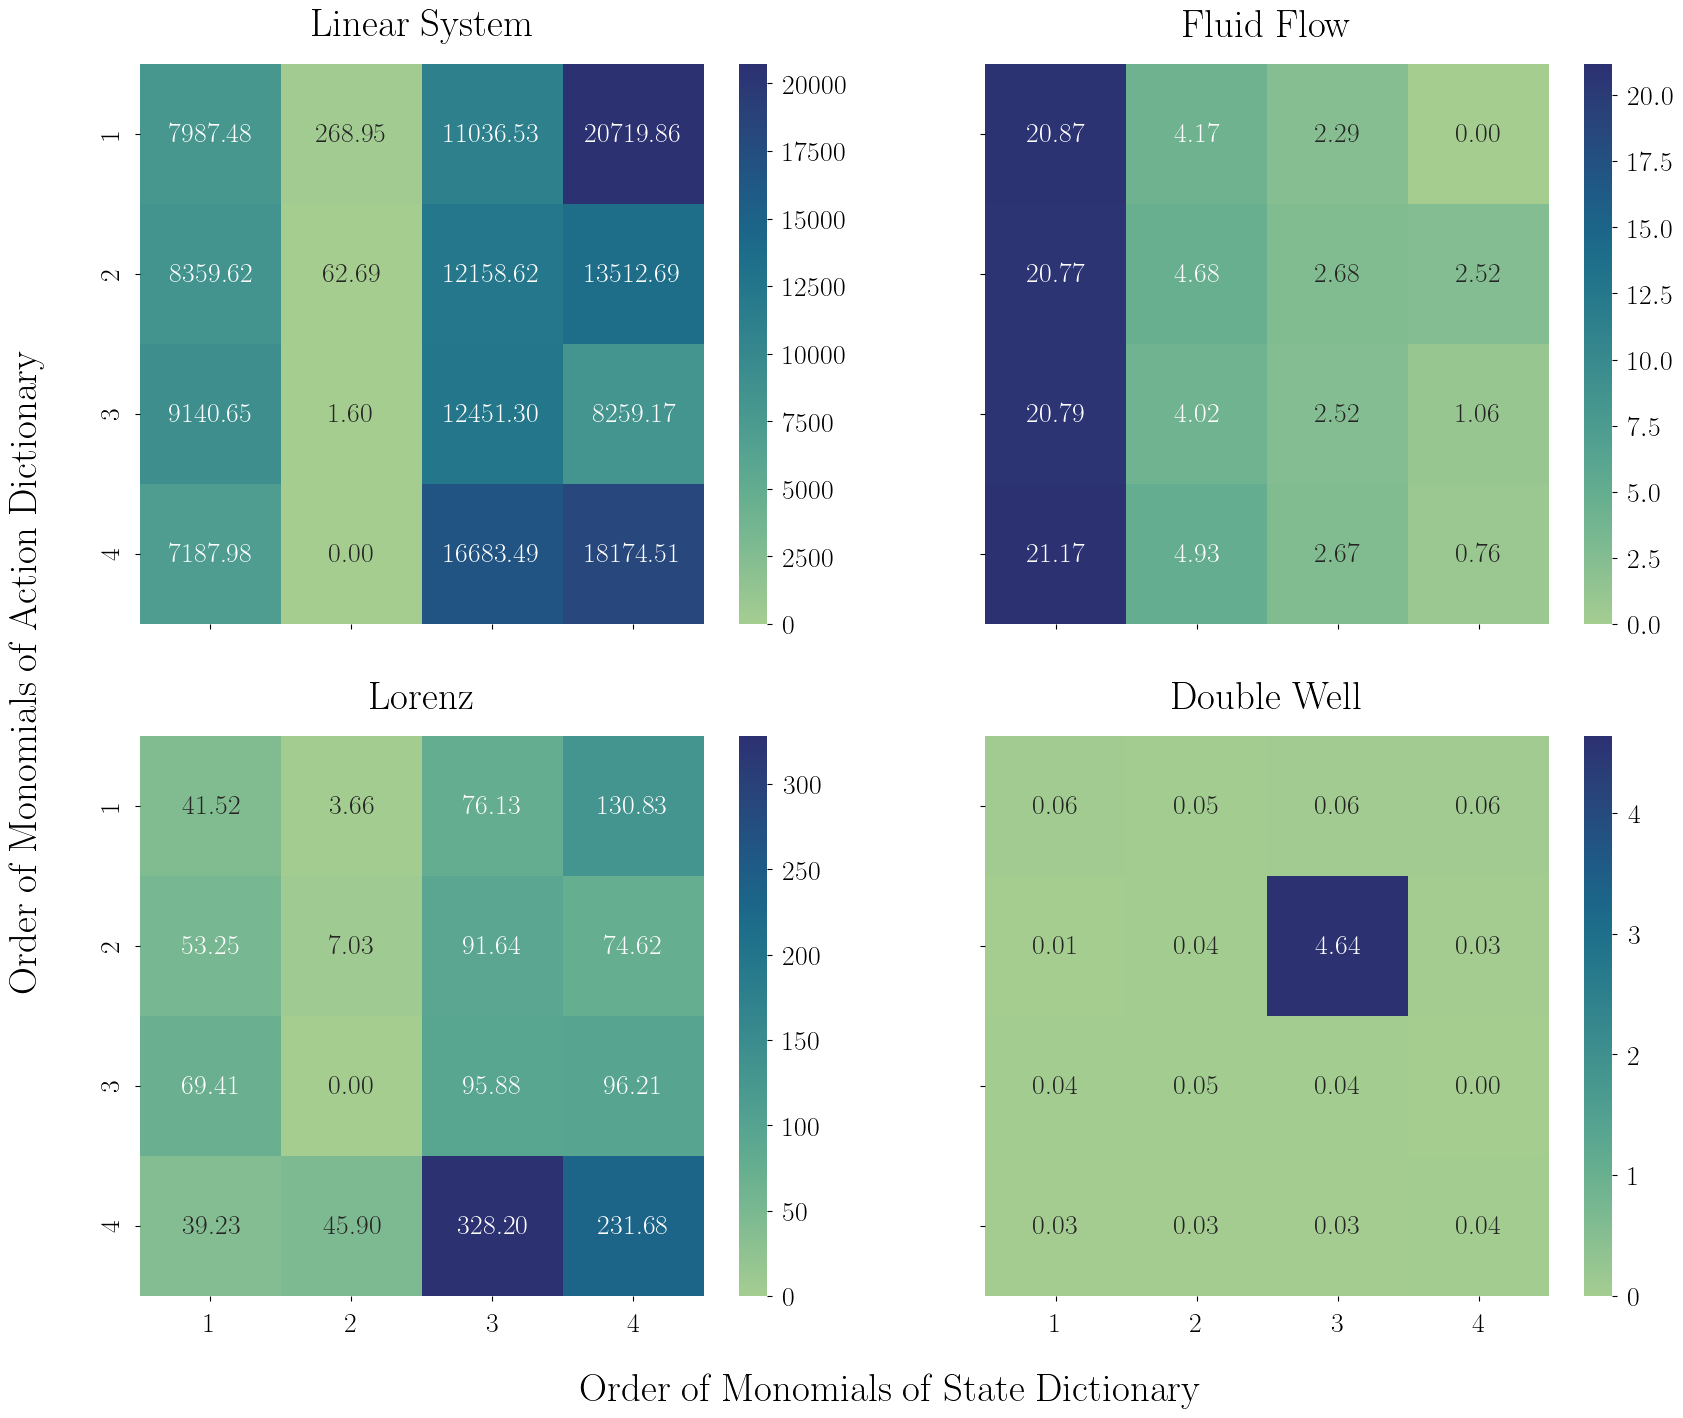

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16), sharex=True, sharey=True)

# Plot all 4 heatmaps
sns.heatmap(ax=axes[0, 0], data=percent_difference_linear_sakc_monoid, annot=True, cmap="crest", fmt='.2f', annot_kws={"fontsize":20}).set_title('Linear System', fontsize=28, pad=20)
sns.heatmap(ax=axes[0, 1], data=percent_difference_fluid_flow_sakc_monoid, annot=True, cmap="crest", fmt='.2f', annot_kws={"fontsize":20}).set_title('Fluid Flow', fontsize=28, pad=20)
sns.heatmap(ax=axes[1, 0], data=percent_difference_lorenz_sakc_monoid, annot=True, cmap="crest", fmt='.2f', annot_kws={"fontsize":20}).set_title('Lorenz', fontsize=28, pad=20)
sns.heatmap(ax=axes[1, 1], data=percent_difference_double_well_sakc_monoid, annot=True, cmap="crest", fmt='.2f', annot_kws={"fontsize":20}).set_title('Double Well', fontsize=28, pad=20)

# Major x-, and y-labels
fig.supxlabel('Order of Monomials of State Dictionary', fontsize=28, y=0.04)
fig.supylabel('Order of Monomials of Action Dictionary', fontsize=28, x=0.06)

In [153]:
# Save the figure
plt.savefig('Ablation_SAKC_Monoids.png')

<Figure size 640x480 with 0 Axes>

In [154]:
# Close the figure
plt.close()

## Compute Budget

In [29]:
linear_system_sakc_compute_csv = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/AblationAnalysis/SAKC/ExplorationBudget/LinearSystem.csv"
fluid_flow_sakc_compute_csv = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/AblationAnalysis/SAKC/ExplorationBudget/FluidFlow.csv"
lorenz_system_sakc_compute_csv = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/AblationAnalysis/SAKC/ExplorationBudget/Lorenz.csv"
double_well_sakc_compute_csv = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/AblationAnalysis/SAKC/ExplorationBudget/DoubleWell.csv"

### Linear System

In [38]:
pd.read_csv(linear_system_sakc_compute_csv, delimiter=',', header=0, index_col=0)

,60,80,100,120,140
100,-10868,-12100,-10925,-10771,-10768
200,-11675,-10943,-11107,-10846,-10909
300,-11485,-11656,-11141,-11750,-12019
400,-10789,-10873,-12065,-11290,-10926
500,-10751,-10800,-11118,-12152,-11950


<Axes: >

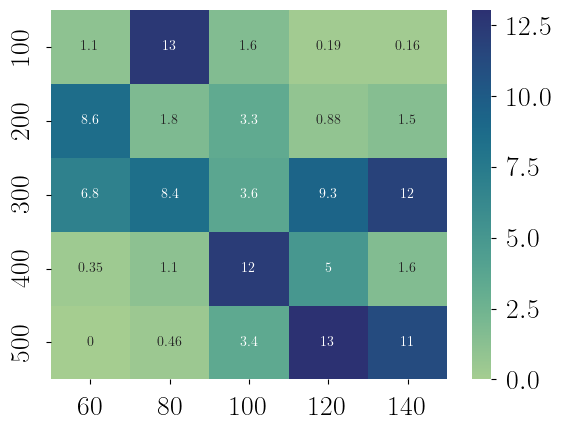

In [30]:
linear_sakc_compute_frame = pd.read_csv(linear_system_sakc_compute_csv, delimiter=',', header=0, index_col=0)
linear_sakc_compute_max_val = linear_sakc_compute_frame.max().max()
percent_difference_linear_sakc_compute = linear_sakc_compute_frame.transform(lambda x: ((x/linear_sakc_compute_max_val) - 1) * 100)

# Plot the heatmap
sns.heatmap(percent_difference_linear_sakc_compute, annot=True, cmap="crest")

# Storing both Pandas dataframes to parquet format
#linear_sakc_compute_frame.to_parquet('linear_sakc_compute.parquet.gzip', compression='gzip')
#percent_difference_linear_sakc_compute.to_parquet('percent_difference_linear_sakc_compute.parquet.gzip', compression='gzip')

### Fluid Flow

<Axes: >

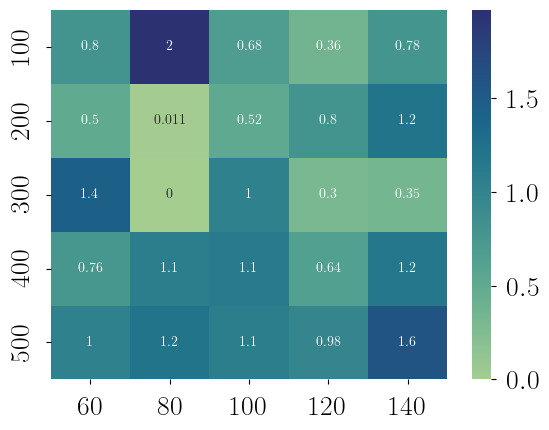

In [31]:
fluid_flow_sakc_compute_frame = pd.read_csv(fluid_flow_sakc_compute_csv, delimiter=',', header=0, index_col=0)
fluid_flow_sakc_compute_max_val = fluid_flow_sakc_compute_frame.max().max()
percent_difference_fluid_flow_sakc_compute = fluid_flow_sakc_compute_frame.transform(lambda x: ((x/fluid_flow_sakc_compute_max_val) - 1) * 100)

# Plot the heatmap
sns.heatmap(percent_difference_fluid_flow_sakc_compute, annot=True, cmap="crest")

# Store both Pandas dataframes into parquet files
#fluid_flow_sakc_compute_frame.to_parquet('fluid_flow_sakc_compute.parquet.gzip', compression='gzip')
#percent_difference_fluid_flow_sakc_compute.to_parquet('percent_difference_fluid_flow_sakc_compute.parquet.gzip', compression='gzip')

### Lorenz

<Axes: >

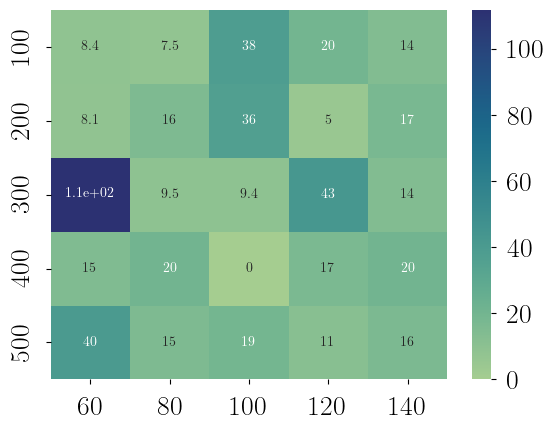

In [32]:
lorenz_sakc_compute_frame = pd.read_csv(lorenz_system_sakc_compute_csv, delimiter=',', header=0, index_col=0)
lorenz_sakc_compute_max_val = lorenz_sakc_compute_frame.max().max()
percent_difference_lorenz_sakc_compute = lorenz_sakc_compute_frame.transform(lambda x: ((x/lorenz_sakc_compute_max_val) - 1) * 100)

# Plot the Heatmap
sns.heatmap(percent_difference_lorenz_sakc_compute, annot=True, cmap="crest")

# Store both Pandas dataframes into parquet files
#lorenz_sakc_compute_frame.to_parquet('lorenz_sakc_compute.parquet.gzip', compression='gzip')
#percent_difference_lorenz_sakc_compute.to_parquet('percent_difference_lorenz_sakc_compute.parquet.gzip', compression='gzip')

### (Stochastic) Double Well

<Axes: >

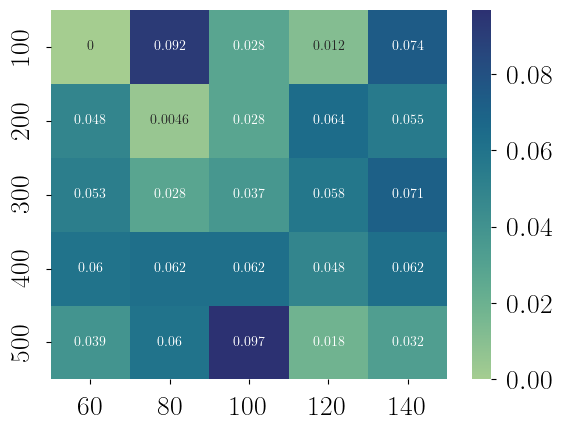

In [33]:
double_well_sakc_compute_frame = pd.read_csv(double_well_sakc_compute_csv, delimiter=',', header=0, index_col=0)
double_well_sakc_compute_max_val = double_well_sakc_compute_frame.max().max()
percent_difference_double_well_sakc_compute = double_well_sakc_compute_frame.transform(lambda x: ((x/double_well_sakc_compute_max_val) - 1) * 100)

# Plot the Heatmap
sns.heatmap(percent_difference_double_well_sakc_compute, annot=True, cmap="crest")

# Store both pandas dataframes into parquet files
#double_well_sakc_compute_frame.to_parquet('double_well_sakc_compute.parquet.gzip', compression='gzip')
#percent_difference_double_well_sakc_compute.to_parquet('percent_difference_double_well_sakc_compute.parquet.gzip', compression='gzip')

## Big Plot containing all 4 Subplots

Text(0.06, 0.5, 'Number of Steps per Path for Koopman Tensor Construction')

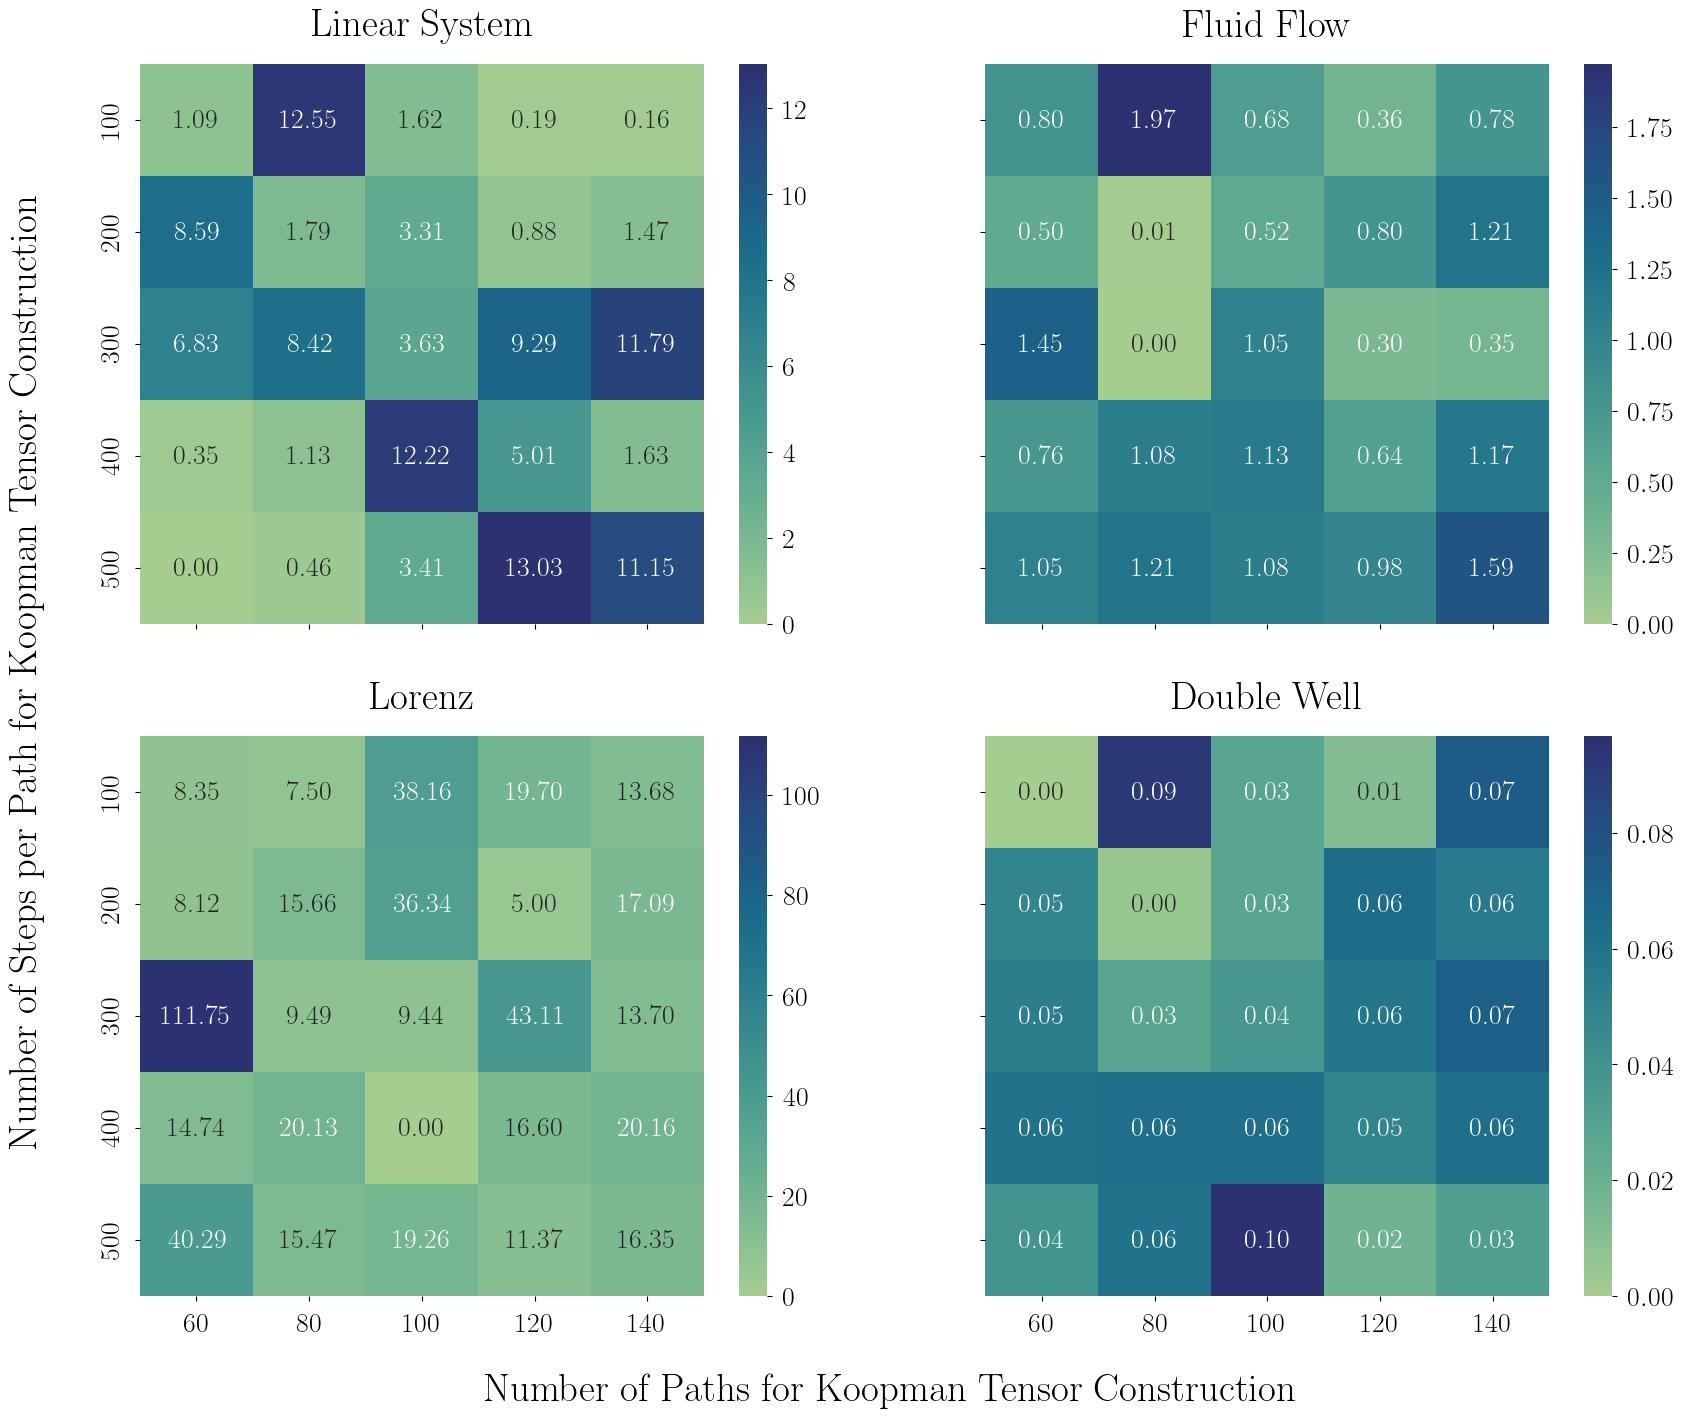

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16), sharex=True, sharey=True)

# Plot all 4 heatmaps
sns.heatmap(ax=axes[0, 0], data=percent_difference_linear_sakc_compute, annot=True, cmap="crest", fmt='.2f', annot_kws={"fontsize":20}).set_title('Linear System', fontsize=28, pad=20)
sns.heatmap(ax=axes[0, 1], data=percent_difference_fluid_flow_sakc_compute, annot=True, cmap="crest", fmt='.2f', annot_kws={"fontsize":20}).set_title('Fluid Flow', fontsize=28, pad=20)
sns.heatmap(ax=axes[1, 0], data=percent_difference_lorenz_sakc_compute, annot=True, cmap="crest", fmt='.2f', annot_kws={"fontsize":20}).set_title('Lorenz', fontsize=28, pad=20)
sns.heatmap(ax=axes[1, 1], data=percent_difference_double_well_sakc_compute, annot=True, cmap="crest", fmt='.2f', annot_kws={"fontsize":20}).set_title('Double Well', fontsize=28, pad=20)

# Major x-, and y-labels
fig.supxlabel('Number of Paths for Koopman Tensor Construction', fontsize=28, y=0.04)
fig.supylabel('Number of Steps per Path for Koopman Tensor Construction', fontsize=28, x=0.06)

In [157]:
# Save the figure
plt.savefig('Ablation_SAKC_Compute.png')

<Figure size 640x480 with 0 Axes>

In [158]:
# Close the figure
plt.close()